In [ ]:
import sys
#!conda install --yes --prefix {sys.prefix} datafinder
#!{sys.executable} -m pip install selenium fredapi pdfminer scikit-learn gensim nltk xgboost pyLDAvis

In [13]:
from time import sleep as sleep
import os
import io
import re
import pandas as pd
from selenium import webdriver
from fredapi import Fred
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

In [14]:
FredAPI = "13ac902d5741ae6d07195be86c583260"

In [15]:
tickers = {'DFF' : 'Effective Federal Funds Rate',
           'DGS1MO':'1-Month Treasury Constant Maturity Rate',
           'DGS3MO':'3-Month Treasury Constant Maturity Rate',
           'DGS6MO':'6-Month Treasury Constant Maturity Rate',
           'DGS1':'1-Year Treasury Constant Maturity Rate',
           'DGS2':'2-Year Treasury Constant Maturity Rate',
           'DGS3':'3-Year Treasury Constant Maturity Rate',
           'DGS5':'5-Year Treasury Constant Maturity Rate',
           'DGS7':'7-Year Treasury Constant Maturity Rate',
           'DGS10':'10-Year Treasury Constant Maturity Rate',
           'DGS20':'20-Year Treasury Constant Maturity Rate',
           'DGS30':'30-Year Treasury Constant Maturity Rate'}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_ = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [16]:
def unique(list1): 
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

def get_fred_data(dict_tickers,fredapi):
    fred = Fred(api_key=fredapi)
    df = pd.DataFrame()
    for tick in dict_tickers.keys():
        temp = fred.get_series(tick)
        df[dict_tickers[tick]] = temp
    return df

def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
            
        text = fake_file_handle.getvalue()
    
    # close open handles
    converter.close()
    fake_file_handle.close()
    
    if text:
        return text

In [17]:
original_dir = os.getcwd()
files_dir  = "C:\\Users\\13473\\Desktop\\Interest Rate Forecasting\\FOMC Documents" 
download_dir = "C:\\Users\\13473\\Desktop\\Interest Rate Forecasting\\FOMC Documents"

In [ ]:
def downloads_done():
    for i in os.listdir(download_dir):
        if ".crdownload" in i:
            sleep(0.5)
            downloads_done()
            
options = webdriver.ChromeOptions()
profile = {"download.default_directory": download_dir,
           "download.prompt_for_download": False, 
            "download.directory_upgrade": True,
            "plugins.always_open_pdf_externally": True}

options.add_experimental_option("prefs", profile)
driver = webdriver.Chrome('./chromedriver/chromedriver.exe', options=options)
driver.implicitly_wait(3)

driver.get(f'https://fraser.stlouisfed.org/title/677')

for y in range(1933,2021):
    for m in months:
        print(m+'/'+y)
        pdf_links = []
        xpath = "//*[contains(text(), '"+m+"') and contains(text(), '"+str(y)+"')]"
        try:
            period = driver.find_element_by_xpath(xpath)
            period.click()
            elems = driver.find_elements_by_css_selector("a[href*='.pdf']")
            for elem in elems:
                if len(elem.text) > 1:
                    pdf_links.append(elem.text)
            for elem in pdf_links:
                download = driver.find_element_by_link_text(elem)
                download.click()
                sleep(1)
                downloads_done()
            print('Sucess')
        except:
            print('Fail') 
            pass
driver.quit()

In [18]:
os.chdir(files_dir)
for f in os.listdir('.'):
    if (f.endswith('(1).pdf') or f.endswith('(2).pdf') or f.endswith('(3).pdf') ):
        os.remove(f)

In [19]:
data = get_fred_data(tickers,FredAPI)
#data = data.fillna(method='ffill')

In [20]:
data

,Effective Federal Funds Rate,1-Month Treasury Constant Maturity Rate,3-Month Treasury Constant Maturity Rate,6-Month Treasury Constant Maturity Rate,1-Year Treasury Constant Maturity Rate,2-Year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,5-Year Treasury Constant Maturity Rate,7-Year Treasury Constant Maturity Rate,10-Year Treasury Constant Maturity Rate,20-Year Treasury Constant Maturity Rate,30-Year Treasury Constant Maturity Rate
1954-07-01,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-02,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-03,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-04,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954-07-05,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,0.08,0.14,0.16,0.18,0.18,0.19,0.22,0.33,0.54,0.71,1.24,1.45
2020-06-13,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-14,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15,0.09,0.15,0.18,0.19,0.17,0.19,0.22,0.33,0.54,0.71,1.24,1.45


In [21]:
os.chdir(original_dir)
data.to_csv('data/data.csv', sep=',')

In [ ]:
os.chdir(files_dir)

pdf_files = []
largest_byte = 0
largest_file = ''

for y in range(1933,2021):
    for m in months_:
        date_filter = str(y)+str(m)
        for f in os.listdir('.'):
            if date_filter in f:
                stat = os.stat(f)
                if stat.st_size > largest_byte:
                    largest_byte = stat.st_size
                    largest_file = f
        pdf_files.append(largest_file)
        largest_file = ''
        largest_byte = 0
pdf_files = unique(pdf_files)

In [ ]:
len(unique(pdf_files))

In [ ]:
df_texts = pd.DataFrame(columns=['file_name','text'])
os.chdir(files_dir)

for file in pdf_files:
    for f in os.listdir('.'):
        if f == file:
            new_text = extract_text_from_pdf(files_dir+ '\\' + f)
            try:
                new_line = pd.DataFrame({'file_name': f, 'text': new_text}, index=[0])
                df_texts = pd.concat([df_texts, new_line])
                print(f+': Success')
            except:
                print(f+': Fail')

In [ ]:
os.chdir(original_dir)
df_texts.to_csv('data/df_texts_initial.csv', sep='\t')
df_texts.shape

In [ ]:
df_texts = pd.read_csv('data/df_texts_initial.csv', sep='\t',usecols=[1,2])

In [ ]:
df_texts['date'] = pd.to_datetime(df_texts['file_name'].apply(lambda x: re.findall(r'(\d{1,4}\d{1,2}\d{1,4})', str(x))[0]))
df_texts = df_texts.drop(['file_name'],axis=1)
df_texts = df_texts.set_index('date')

In [ ]:
os.chdir(original_dir)
df_texts.to_csv('data/df_texts.csv', sep='\t')
df_texts.shape

In [ ]:
df_texts

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from symspellpy.symspellpy import SymSpell, Verbosity
from nltk.stem import SnowballStemmer
from xgboost import XGBClassifier, plot_importance
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora, models
import pyLDAvis.gensim
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

pyLDAvis.enable_notebook()
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
tickers = {'DFF' : 'Effective Federal Funds Rate',
           'DGS1MO':'1-Month Treasury Constant Maturity Rate',
           'DGS3MO':'3-Month Treasury Constant Maturity Rate',
           'DGS6MO':'6-Month Treasury Constant Maturity Rate',
           'DGS1':'1-Year Treasury Constant Maturity Rate',
           'DGS2':'2-Year Treasury Constant Maturity Rate',
           'DGS3':'3-Year Treasury Constant Maturity Rate',
           'DGS5':'5-Year Treasury Constant Maturity Rate',
           'DGS7':'7-Year Treasury Constant Maturity Rate',
           'DGS10':'10-Year Treasury Constant Maturity Rate',
           'DGS20':'20-Year Treasury Constant Maturity Rate',
           'DGS30':'30-Year Treasury Constant Maturity Rate'}

In [2]:
original_dir = os.getcwd()
files_dir  = "C:\\Users\\13473\\Desktop\\Interest Rate Forecasting\\FOMC Documents" 
download_dir = "C:\\Users\\13473\\Desktop\\Interest Rate Forecasting\\FOMC Documents"

In [3]:
os.chdir(original_dir)

In [4]:
df_texts = pd.read_csv('data/df_texts_spellchecked.csv', sep='\t',index_col='date')
df_texts.shape

(889, 1)

In [5]:
df_texts

,text
date,
1933-07-20,reproduced from the unclassified a reclassifie...
1933-09-21,reproduced from the unclassified a reclassifie...
1933-10-10,reproduced from the unclassified a reclassifie...
1934-03-05,reproduced from the unclassified a reclassifie...
1934-04-02,reproduced from the unclassified a reclassifie...
...,...
2020-01-15,The Beige Book Summary of Commentary on Curren...
2020-03-15,Minutes of the Federal Open Market Committee...
2020-04-15,The Beige Book Summary of Commentary on Curren...


In [ ]:
initial_capacity = 83000  # increase to improve accuracy at cost of speed
max_edit_distance_dictionary = 3 # increase to improve accuracy at cost of speed
prefix_length = 10 # increase to improve accuracy at cost of speed

for x in range(321,890):
    print(x, end =" ")
    try:
        sym_spell = SymSpell(count_threshold=initial_capacity, max_dictionary_edit_distance=max_edit_distance_dictionary, prefix_length=prefix_length)
        sym_spell.load_dictionary('frequency_dict.txt', 0, 1)
        if not sym_spell.load_dictionary('frequency_dict.txt', 0, 1):
            print("Dictionary file not found")

        string_variable = sym_spell.word_segmentation(df_texts.iloc[x]['text'])
        df_texts.iloc[x]['text'] = string_variable.corrected_string
        df_texts.to_csv('./data/df_texts_spellchecked.csv', sep='\t')
        print(': Success')
    except:
        print(': Fail')


In [47]:
df_texts = pd.read_csv('data/df_texts_spellchecked.csv', sep='\t',index_col='date')
df_texts.index = pd.to_datetime(df_texts.index)
df_texts['t'] = df_texts.index 
df_texts['t+1'] = df_texts.index + pd.DateOffset(months=1)
df_texts['t+3'] = df_texts.index + pd.DateOffset(months=3)
df_texts['t+6'] = df_texts.index + pd.DateOffset(months=6)

data = pd.read_csv('data/data.csv', sep=',',index_col=0)
data.index = pd.to_datetime(data.index)
data = data.fillna(method='ffill')

df_texts = df_texts.merge(data,how='left',left_on='t',right_index=True)

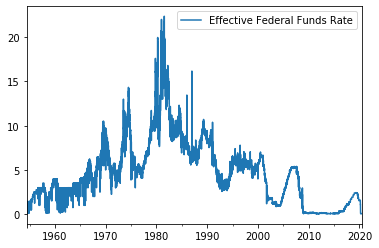

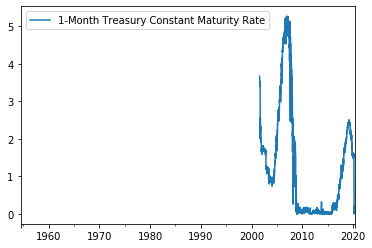

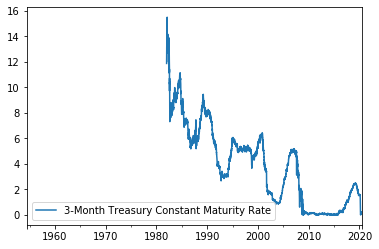

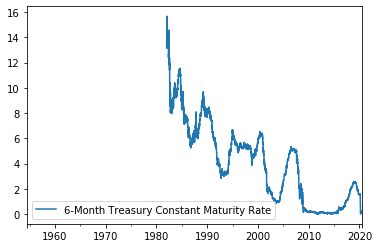

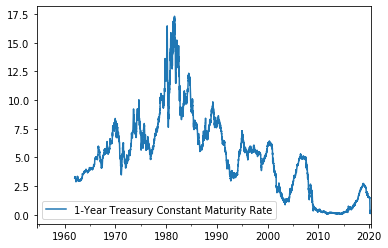

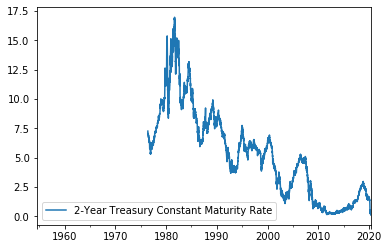

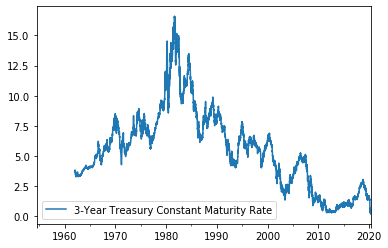

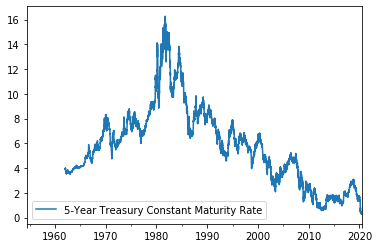

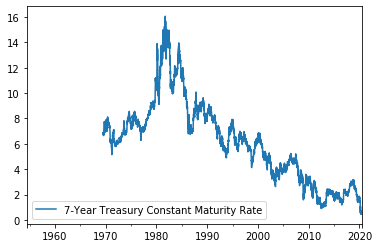

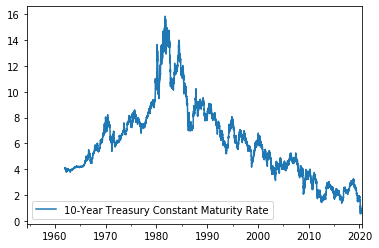

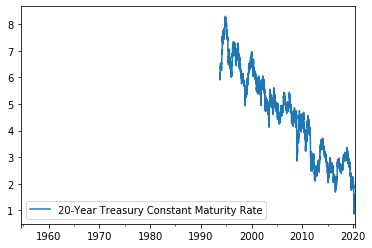

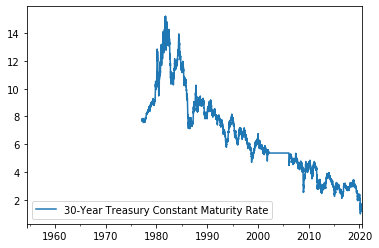

In [62]:
for tick in tickers:
    plt.figure()
    data[tickers[tick]].plot()
    plt.legend()

In [48]:
df_complete_one_month = df_texts.merge(data,how='left',left_on='t+1',right_index=True,suffixes=('','_t+1'))
df_complete_three_month = df_texts.merge(data,how='left',left_on='t+3',right_index=True,suffixes=('','_t+3')) 
df_complete_six_month = df_texts.merge(data,how='left',left_on='t+6',right_index=True,suffixes=('','_t+6')) 

In [87]:
threshold = 0.01

for tick in tickers:
    df_complete_one_month[tick+'_change'] = (df_complete_one_month[tickers[tick]+'_t+1'] - df_complete_one_month[tickers[tick]])/df_complete_one_month[tickers[tick]] 
    df_complete_one_month[tick+'_change'] = np.where(np.isnan(df_complete_one_month[tick+'_change']),np.nan,np.where(df_complete_one_month[tick+'_change']>threshold, 1,np.where(df_complete_one_month[tick+'_change']<-threshold,-1,0)))
    df_complete_three_month[tick+'_change'] = (df_complete_three_month[tickers[tick]+'_t+3'] - df_complete_three_month[tickers[tick]])/df_complete_three_month[tickers[tick]] 
    df_complete_three_month[tick+'_change'] = np.where(np.isnan(df_complete_three_month[tick+'_change']),np.nan,np.where(df_complete_three_month[tick+'_change']>threshold, 1,np.where(df_complete_three_month[tick+'_change']<-threshold,-1,0)))
    df_complete_six_month[tick+'_change'] = (df_complete_six_month[tickers[tick]+'_t+6'] - df_complete_six_month[tickers[tick]])/df_complete_six_month[tickers[tick]] 
    df_complete_six_month[tick+'_change'] =np.where(np.isnan(df_complete_six_month[tick+'_change']),np.nan, np.where(df_complete_six_month[tick+'_change']>threshold, 1,np.where(df_complete_six_month[tick+'_change']<-threshold,-1,0)))

In [88]:
for tick in tickers:
    print(df_complete_one_month[tick+'_change'].value_counts())

 1.0    295
-1.0    253
 0.0    167
Name: DFF_change, dtype: int64
 1.0    92
-1.0    73
 0.0    18
Name: DGS1MO_change, dtype: int64
-1.0    171
 1.0    157
 0.0     61
Name: DGS3MO_change, dtype: int64
-1.0    171
 1.0    156
 0.0     62
Name: DGS6MO_change, dtype: int64
 1.0    267
-1.0    258
 0.0    100
Name: DGS1_change, dtype: int64
-1.0    206
 1.0    193
 0.0     55
Name: DGS2_change, dtype: int64
-1.0    271
 1.0    261
 0.0     93
Name: DGS3_change, dtype: int64
-1.0    278
 1.0    262
 0.0     85
Name: DGS5_change, dtype: int64
-1.0    247
 1.0    218
 0.0     70
Name: DGS7_change, dtype: int64
-1.0    266
 1.0    238
 0.0    121
Name: DGS10_change, dtype: int64
-1.0    129
 1.0    102
 0.0     30
Name: DGS20_change, dtype: int64
-1.0    181
 1.0    163
 0.0    102
Name: DGS30_change, dtype: int64


In [89]:
for tick in tickers:
    print(df_complete_three_month[tick+'_change'].value_counts())

 1.0    343
-1.0    276
 0.0     95
Name: DFF_change, dtype: int64
 1.0    87
-1.0    85
 0.0     9
Name: DGS1MO_change, dtype: int64
-1.0    189
 1.0    167
 0.0     32
Name: DGS3MO_change, dtype: int64
-1.0    189
 1.0    156
 0.0     43
Name: DGS6MO_change, dtype: int64
 1.0    315
-1.0    265
 0.0     44
Name: DGS1_change, dtype: int64
 1.0    220
-1.0    208
 0.0     25
Name: DGS2_change, dtype: int64
 1.0    310
-1.0    269
 0.0     45
Name: DGS3_change, dtype: int64
 1.0    309
-1.0    265
 0.0     50
Name: DGS5_change, dtype: int64
 1.0    244
-1.0    243
 0.0     47
Name: DGS7_change, dtype: int64
 1.0    290
-1.0    262
 0.0     72
Name: DGS10_change, dtype: int64
-1.0    140
 1.0     93
 0.0     27
Name: DGS20_change, dtype: int64
-1.0    193
 1.0    171
 0.0     81
Name: DGS30_change, dtype: int64


In [90]:
for tick in tickers:
    print(df_complete_six_month[tick+'_change'].value_counts())

 1.0    387
-1.0    271
 0.0     54
Name: DFF_change, dtype: int64
-1.0    90
 1.0    83
 0.0     7
Name: DGS1MO_change, dtype: int64
-1.0    192
 1.0    171
 0.0     23
Name: DGS3MO_change, dtype: int64
-1.0    199
 1.0    167
 0.0     20
Name: DGS6MO_change, dtype: int64
 1.0    313
-1.0    273
 0.0     36
Name: DGS1_change, dtype: int64
 1.0    225
-1.0    212
 0.0     14
Name: DGS2_change, dtype: int64
 1.0    321
-1.0    274
 0.0     27
Name: DGS3_change, dtype: int64
 1.0    305
-1.0    282
 0.0     35
Name: DGS5_change, dtype: int64
-1.0    266
 1.0    239
 0.0     27
Name: DGS7_change, dtype: int64
 1.0    296
-1.0    281
 0.0     45
Name: DGS10_change, dtype: int64
-1.0    143
 1.0     97
 0.0     18
Name: DGS20_change, dtype: int64
-1.0    210
 1.0    167
 0.0     66
Name: DGS30_change, dtype: int64


In [91]:
df_complete_one_month['text']  = [i.lower() for i in df_complete_one_month['text']]
df_complete_three_month['text']  = [i.lower() for i in df_complete_three_month['text']] 
df_complete_six_month['text']  = [i.lower() for i in df_complete_six_month['text']] 

In [93]:
snow = SnowballStemmer('english',)
df_complete_one_month['text']  = [snow.stem(i) for i in df_complete_one_month['text']]
df_complete_three_month['text']  = [snow.stem(i) for i in df_complete_three_month['text']]
df_complete_six_month['text']  = [snow.stem(i) for i in df_complete_six_month['text']] 

In [94]:
df_complete_one_month.to_csv('./data/df_complete_one_month_stemmed.csv', sep='\t')
df_complete_three_month.to_csv('./data/df_complete_three_month_stemmed.csv', sep='\t')
df_complete_six_month.to_csv('./data/df_complete_six_month_stemmed.csv', sep='\t')

In [97]:
df_complete_one_month = pd.read_csv('./data/df_complete_one_month_stemmed.csv', sep='\t',index_col=0)
df_complete_three_month = pd.read_csv('./data/df_complete_three_month_stemmed.csv', sep='\t',index_col=0)
df_complete_six_month = pd.read_csv('./data/df_complete_six_month_stemmed.csv', sep='\t',index_col=0)

In [98]:
df_complete_one_month

,text,t,t+1,t+3,t+6,Effective Federal Funds Rate,1-Month Treasury Constant Maturity Rate,3-Month Treasury Constant Maturity Rate,6-Month Treasury Constant Maturity Rate,1-Year Treasury Constant Maturity Rate,...,DGS3MO_change,DGS6MO_change,DGS1_change,DGS2_change,DGS3_change,DGS5_change,DGS7_change,DGS10_change,DGS20_change,DGS30_change
date,,,,,,,,,,,,,,,,,,,,,
1933-07-20,reproduced from the unclassified a reclassifie...,1933-07-20,1933-08-20,1933-10-20,1934-01-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-09-21,reproduced from the unclassified a reclassifie...,1933-09-21,1933-10-21,1933-12-21,1934-03-21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-10-10,reproduced from the unclassified a reclassifie...,1933-10-10,1933-11-10,1934-01-10,1934-04-10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-03-05,reproduced from the unclassified a reclassifie...,1934-03-05,1934-04-05,1934-06-05,1934-09-05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-04-02,reproduced from the unclassified a reclassifie...,1934-04-02,1934-05-02,1934-07-02,1934-10-02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-15,the beige book summary of commentary on curren...,2020-01-15,2020-02-15,2020-04-15,2020-07-15,1.54,1.53,1.57,1.58,1.54,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-03-15,minutes of the federal open market committee...,2020-03-15,2020-04-15,2020-06-15,2020-09-15,1.10,0.33,0.28,0.38,0.38,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-04-15,the beige book summary of commentary on curren...,2020-04-15,2020-05-15,2020-07-15,2020-10-15,0.05,0.14,0.14,0.19,0.19,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0
